## Preprocessing

In [46]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import tensorflow as tf
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

#  Import and read the charity_data.csv.
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head(5)

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [47]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis=1)
application_df_copy = application_df.copy()

In [48]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [49]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [50]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff_value = 500
application_types_to_replace = application_df['APPLICATION_TYPE'].value_counts()[application_df['APPLICATION_TYPE'].value_counts() < cutoff_value].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [51]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [52]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts[classification_counts > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [53]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff_value = 500
classifications_to_replace = application_df['CLASSIFICATION'].value_counts()[application_df['CLASSIFICATION'].value_counts() < cutoff_value].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [54]:
# Convert categorical data to numeric with `pd.get_dummies`
dummy_application_df = pd.get_dummies(application_df)
dummy_application_df.head(5)

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [55]:
# Split our preprocessed data into our features and target arrays
X = dummy_application_df.drop('IS_SUCCESSFUL', axis=1)
y = dummy_application_df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [56]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [74]:
# Define the model
nn_default = tf.keras.models.Sequential()

# First hidden layer
nn_default.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=X_train_scaled.shape[1]))

# Second hidden layer
nn_default.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn_default.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_default.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 80)                3600      
                                                                 
 dense_16 (Dense)            (None, 30)                2430      
                                                                 
 dense_17 (Dense)            (None, 1)                 31        
                                                                 
Total params: 6,061
Trainable params: 6,061
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Compile the model
nn_default.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [76]:
# Train the model
history = nn_default.fit(X_train_scaled, y_train, epochs=10, verbose=2, batch_size=16)

Epoch 1/10
1608/1608 - 4s - loss: 0.5714 - accuracy: 0.7201 - 4s/epoch - 2ms/step
Epoch 2/10
1608/1608 - 3s - loss: 0.5562 - accuracy: 0.7283 - 3s/epoch - 2ms/step
Epoch 3/10
1608/1608 - 2s - loss: 0.5525 - accuracy: 0.7299 - 2s/epoch - 2ms/step
Epoch 4/10
1608/1608 - 2s - loss: 0.5508 - accuracy: 0.7298 - 2s/epoch - 1ms/step
Epoch 5/10
1608/1608 - 2s - loss: 0.5492 - accuracy: 0.7318 - 2s/epoch - 1ms/step
Epoch 6/10
1608/1608 - 3s - loss: 0.5482 - accuracy: 0.7338 - 3s/epoch - 2ms/step
Epoch 7/10
1608/1608 - 3s - loss: 0.5469 - accuracy: 0.7320 - 3s/epoch - 2ms/step
Epoch 8/10
1608/1608 - 2s - loss: 0.5460 - accuracy: 0.7329 - 2s/epoch - 2ms/step
Epoch 9/10
1608/1608 - 3s - loss: 0.5459 - accuracy: 0.7331 - 3s/epoch - 2ms/step
Epoch 10/10
1608/1608 - 3s - loss: 0.5459 - accuracy: 0.7330 - 3s/epoch - 2ms/step


In [77]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_default.evaluate(X_test_scaled,y_test,verbose=1, batch_size=1)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 [==============================] - 23s 3ms/step - loss: 0.5529 - accuracy: 0.7289
Loss: 0.5529197454452515, Accuracy: 0.728863000869751


In [78]:
# Export our model to HDF5 file
nn_default.save('AlphabetSoupCharity_default_no_op.h5')

## Optimization Preprocessing Method 1 - Add/Drop Columns

In [320]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

# Make a copy of the working dataset
application_df_dropping = application_df_copy.copy()

print("Step 1 of 6 - Start... Samples: ", len(application_df_dropping), " | (No dummies) Columns/Features: ", len(application_df_dropping.columns))

Step 1 of 6 - Start... Samples:  34299  | (No dummies) Columns/Features:  10


In [321]:
cutoff_value = 500
application_types_to_replace = application_df_dropping['APPLICATION_TYPE'].value_counts()[application_df_dropping['APPLICATION_TYPE'].value_counts() < cutoff_value].index.tolist()

for app in application_types_to_replace:
    application_df_dropping['APPLICATION_TYPE'] = application_df_dropping['APPLICATION_TYPE'].replace(app,"Other")

cutoff_value2 = 500
classifications_to_replace = application_df_dropping['CLASSIFICATION'].value_counts()[application_df_dropping['CLASSIFICATION'].value_counts() < cutoff_value2].index.tolist()

for cls in classifications_to_replace:
    application_df_dropping['CLASSIFICATION'] = application_df_dropping['CLASSIFICATION'].replace(cls,"Other")

print("Step 2 of 6 - Simplify 'APPLICATION_TYPE' & 'CLASSIFICATION'... Samples: ", len(application_df_dropping), " | (No dummies) Columns/Features: ", len(application_df_dropping.columns))

Step 2 of 6 - Simplify 'APPLICATION_TYPE' & 'CLASSIFICATION'... Samples:  34299  | (No dummies) Columns/Features:  10


In [322]:
dummy_working_dropping_df = pd.get_dummies(application_df_dropping)
dummy_working_dropping_df.head(3)

print("Step 3 of 6 - Get Dummies... Samples: ", len(dummy_working_dropping_df), " | Columns/Features: ", len(dummy_working_dropping_df.columns))
dummy_working_dropping_df.head(3)

Step 3 of 6 - Get Dummies... Samples:  34299  | Columns/Features:  45


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


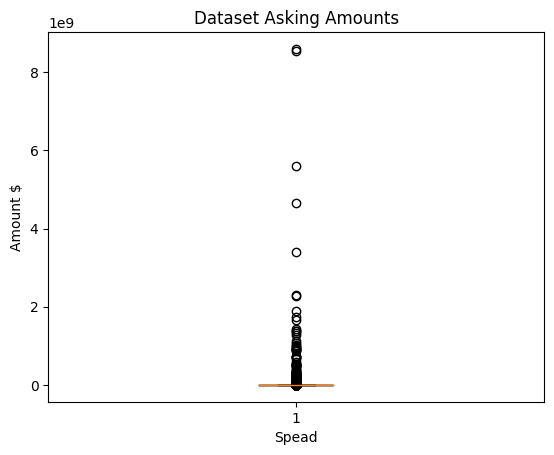

In [323]:
import numpy as np
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_title('Dataset Asking Amounts')
ax1.set_ylabel('Amount $')
ax1.set_xlabel('Spead')
ax1.boxplot(dummy_working_dropping_df['ASK_AMT'])
plt.show()

In [324]:
# Determine which data points are outside of the 1.5*IQR range
quartiles = np.quantile(dummy_working_dropping_df['ASK_AMT'],[.25,.75])
iqr = quartiles[1]-quartiles[0]
lower_bound = quartiles[0]-(1.45*iqr)
upper_bound = quartiles[1]+(1.45*iqr)
print("Lower boundry: ", lower_bound, " | Upper boundry: ", upper_bound)

potential_outliers = [AMT for AMT in dummy_working_dropping_df['ASK_AMT'] if AMT < lower_bound or AMT > upper_bound]
print("Samples in dataset prior to outlier removal: " + str(len(dummy_working_dropping_df['ASK_AMT'])))
print("After outlier removal: " + str(len(dummy_working_dropping_df['ASK_AMT']) - len(potential_outliers)))

Lower boundry:  1024.1  | Upper boundry:  11717.9
Samples in dataset prior to outlier removal: 34299
After outlier removal: 26078


In [325]:
# Drop the unnecessary rows from the dataset
condensed_data = dummy_working_dropping_df[~dummy_working_dropping_df['ASK_AMT'].isin(potential_outliers)]
print("Step 4 of 6 - Remove rows where 'ASK_AMT' is an outlier... Samples: ", len(condensed_data), " | Columns/Features: ", len(condensed_data.columns))

Step 4 of 6 - Remove rows where 'ASK_AMT' is an outlier... Samples:  26078  | Columns/Features:  45


In [326]:
X_dropping = condensed_data.drop('IS_SUCCESSFUL', axis=1)
y_dropping = condensed_data['IS_SUCCESSFUL']

X_train_column_drop, X_test_column_drop, y_train_column_drop, y_test_column_drop = train_test_split(X_dropping, y_dropping, test_size=0.25, random_state=1)

print("Step 5 of 6 - Split training and testing samples... Samples: ", len(X_train_column_drop), " | Columns/Features: ", len(X_train_column_drop.columns))

Step 5 of 6 - Split training and testing samples... Samples:  19558  | Columns/Features:  44


In [327]:
# Create a Lasso model
lasso_model = Lasso(alpha=0.1)  # Adjust the alpha parameter for regularization strength
lasso_model.fit(X_train_column_drop, y_train_column_drop)

lasso_predictions = lasso_model.predict(X_test_column_drop)
lasso_rmse = mean_squared_error(y_test_column_drop, lasso_predictions, squared=False)
print("Lasso RMSE:", lasso_rmse)

# Create a Ridge model
ridge_model = Ridge(alpha=0.1)  # Adjust the alpha parameter for regularization strength
ridge_model.fit(X_train_column_drop, y_train_column_drop)

ridge_predictions = ridge_model.predict(X_test_column_drop)
ridge_rmse = mean_squared_error(y_test_column_drop, ridge_predictions, squared=False)
print("Ridge RMSE:", ridge_rmse)

print("- - -")

lasso_coeffs = lasso_model.coef_
ridge_coeffs = ridge_model.coef_

# make an array of columns to drop after failing Lasso and Ridge tests
drop_columns = []

Lower_Ridge = -0.005
Upper_Ridge = 0.005

for i in range(len(lasso_coeffs)):
    if lasso_coeffs[i] == 0 and ((ridge_coeffs[i] > Lower_Ridge and ridge_coeffs[i] <= 0) or (ridge_coeffs[i] < Upper_Ridge and ridge_coeffs[i] >= 0)):
        drop_columns.append(i)

print(drop_columns)
print("# of Columns/Features that will be dropped", len(drop_columns))

# remove columns from X1 df
X_train_column_drop = X_train_column_drop.drop(X_train_column_drop.columns[drop_columns], axis=1)
X_test_column_drop = X_test_column_drop.drop(X_test_column_drop.columns[drop_columns], axis=1)

print("Step 6 of 6 - Remove Columns that fail Lasso & Ridge Tests... Samples: ", len(X_train_column_drop), " | Columns/Features: ", len(X_train_column_drop.columns))

Lasso RMSE: 0.4993190478758795
Ridge RMSE: 0.4307788485480379
- - -
[2, 27]
# of Columns/Features that will be dropped 2
Step 6 of 6 - Remove Columns that fail Lasso & Ridge Tests... Samples:  19558  | Columns/Features:  42


In [328]:
X_scaler_columns_dropped = scaler.fit(X_train_column_drop)

X_train_column_drop_scaled = X_scaler_columns_dropped.transform(X_train_column_drop)
X_test_column_drop_scaled = X_scaler_columns_dropped.transform(X_test_column_drop)

# Define the model
nn_column_drop = tf.keras.models.Sequential()

# First hidden layer
nn_column_drop.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=X_train_column_drop_scaled.shape[1]))

# Second hidden layer
nn_column_drop.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn_column_drop.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_column_drop.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 80)                3440      
                                                                 
 dense_109 (Dense)           (None, 30)                2430      
                                                                 
 dense_110 (Dense)           (None, 1)                 31        
                                                                 
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________


In [329]:
nn_column_drop.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_column_drop = nn_column_drop.fit(X_train_column_drop_scaled, y_train_column_drop, epochs=10, verbose=1, batch_size=16)

Epoch 1/10
1223/1223 [==============================] - 4s 2ms/step - loss: 0.5533 - accuracy: 0.7368
Epoch 2/10
1223/1223 [==============================] - 2s 2ms/step - loss: 0.5398 - accuracy: 0.7415
Epoch 3/10
1223/1223 [==============================] - 2s 2ms/step - loss: 0.5361 - accuracy: 0.7437
Epoch 4/10
1223/1223 [==============================] - 5s 4ms/step - loss: 0.5352 - accuracy: 0.7460
Epoch 5/10
1223/1223 [==============================] - 3s 2ms/step - loss: 0.5324 - accuracy: 0.7455
Epoch 6/10
1223/1223 [==============================] - 2s 2ms/step - loss: 0.5321 - accuracy: 0.7461
Epoch 7/10
1223/1223 [==============================] - 2s 2ms/step - loss: 0.5313 - accuracy: 0.7465
Epoch 8/10
1223/1223 [==============================] - 2s 2ms/step - loss: 0.5305 - accuracy: 0.7473
Epoch 9/10
1223/1223 [==============================] - 2s 2ms/step - loss: 0.5303 - accuracy: 0.7483
Epoch 10/10
1223/1223 [==============================] - 3s 3ms/step - loss: 0.529

In [330]:
model_loss, model_accuracy = nn_column_drop.evaluate(X_test_column_drop_scaled,y_test_column_drop,verbose=1, batch_size=16)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

408/408 [==============================] - 1s 1ms/step - loss: 0.5391 - accuracy: 0.7535
Loss: 0.5391210913658142, Accuracy: 0.7535275816917419


In [331]:
# Export our model to HDF5 file
nn_column_drop.save('AlphabetSoupCharity_Optimization_Dropping_Columns.h5')

## Optimization Preprocessing Method 2 - PCA

In [228]:
# Create PCA Model
pca_model = PCA(n_components=40)

In [229]:
pca_model = pca_model.fit(X_train_column_drop_scaled)

pca_X_train = pca_model.transform(X_train_column_drop_scaled)
pca_X_test = pca_model.transform(X_test_column_drop_scaled)

# Training DataFrame with the PCA components
pca_df = pd.DataFrame(data=pca_X_train, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 
                                                'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20',
                                                'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30',
                                                'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40'])

# View the first five rows of the DataFrame
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,0.601878,-1.602990,0.449661,0.094304,-1.446635,-0.251015,-0.021516,-0.120556,-0.020658,0.160635,...,-0.026735,-0.006530,-0.002828,0.051312,0.046377,-0.117131,0.110256,-0.042984,-0.140422,0.209963
1,-1.826470,-0.127961,-0.385204,-0.001923,0.934805,-0.936857,0.006859,-0.541575,0.332264,-1.314413,...,0.030559,0.009032,-0.000590,0.040469,0.101737,-0.008031,0.018590,-0.000574,0.050204,0.014945
2,-0.795157,-1.256882,0.304779,-0.247162,1.220582,1.426650,0.417246,-0.095759,-0.211240,0.625877,...,-0.027029,-0.018813,-0.030073,0.069795,0.109117,-0.085183,0.154539,-0.057753,-0.389696,0.092740
3,-0.876306,-1.702606,0.602707,-0.358838,0.828450,0.873587,-0.593384,2.696117,-0.318137,0.985441,...,0.035761,0.105837,0.071319,-0.166734,-0.285487,0.031277,-0.365393,0.149243,0.633718,-0.584382
4,-0.700460,-0.766304,-0.333087,0.116217,-0.617199,0.343100,-0.521549,1.022282,-0.112710,0.317176,...,-0.037682,-0.007553,-0.045301,0.067981,0.114962,-0.135320,0.176038,-0.063946,-0.411447,0.179432


In [230]:
# Retrieve the explained variance from the PCA model
explained_variance = pca_model.explained_variance_ratio_
Scope = 0

# Print the explained variance for each principal component
for i, variance in enumerate(explained_variance):
    Scope = Scope + variance
    print(f"Explained Variance PC{i+1}: {variance:.4f}")

print(f"{Scope * 100:.2f}%")

Explained Variance PC1: 0.0671
Explained Variance PC2: 0.0402
Explained Variance PC3: 0.0304
Explained Variance PC4: 0.0292
Explained Variance PC5: 0.0271
Explained Variance PC6: 0.0220
Explained Variance PC7: 0.0217
Explained Variance PC8: 0.0194
Explained Variance PC9: 0.0176
Explained Variance PC10: 0.0174
Explained Variance PC11: 0.0171
Explained Variance PC12: 0.0166
Explained Variance PC13: 0.0165
Explained Variance PC14: 0.0161
Explained Variance PC15: 0.0158
Explained Variance PC16: 0.0155
Explained Variance PC17: 0.0153
Explained Variance PC18: 0.0150
Explained Variance PC19: 0.0149
Explained Variance PC20: 0.0149
Explained Variance PC21: 0.0148
Explained Variance PC22: 0.0146
Explained Variance PC23: 0.0146
Explained Variance PC24: 0.0145
Explained Variance PC25: 0.0145
Explained Variance PC26: 0.0145
Explained Variance PC27: 0.0145
Explained Variance PC28: 0.0145
Explained Variance PC29: 0.0145
Explained Variance PC30: 0.0145
Explained Variance PC31: 0.0145
Explained Varianc

In [232]:
# Define the model
nn_pca = tf.keras.models.Sequential()

# First hidden layer
nn_pca.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=pca_X_train.shape[1]))

# Second hidden layer
nn_pca.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn_pca.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_pca.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 80)                3280      
                                                                 
 dense_85 (Dense)            (None, 30)                2430      
                                                                 
 dense_86 (Dense)            (None, 1)                 31        
                                                                 
Total params: 5,741
Trainable params: 5,741
Non-trainable params: 0
_________________________________________________________________


In [233]:
# Compile the model
nn_pca.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [234]:
# Train the model
history_pca = nn_pca.fit(pca_X_train, y_train_column_drop, epochs=10, verbose=2, batch_size=16)

Epoch 1/10
1224/1224 - 3s - loss: 0.5517 - accuracy: 0.7404 - 3s/epoch - 3ms/step
Epoch 2/10
1224/1224 - 2s - loss: 0.5350 - accuracy: 0.7469 - 2s/epoch - 2ms/step
Epoch 3/10
1224/1224 - 2s - loss: 0.5321 - accuracy: 0.7474 - 2s/epoch - 1ms/step
Epoch 4/10
1224/1224 - 2s - loss: 0.5296 - accuracy: 0.7489 - 2s/epoch - 1ms/step
Epoch 5/10
1224/1224 - 2s - loss: 0.5278 - accuracy: 0.7518 - 2s/epoch - 2ms/step
Epoch 6/10
1224/1224 - 2s - loss: 0.5262 - accuracy: 0.7513 - 2s/epoch - 2ms/step
Epoch 7/10
1224/1224 - 3s - loss: 0.5259 - accuracy: 0.7512 - 3s/epoch - 2ms/step
Epoch 8/10
1224/1224 - 2s - loss: 0.5245 - accuracy: 0.7522 - 2s/epoch - 2ms/step
Epoch 9/10
1224/1224 - 2s - loss: 0.5233 - accuracy: 0.7520 - 2s/epoch - 1ms/step
Epoch 10/10
1224/1224 - 2s - loss: 0.5229 - accuracy: 0.7526 - 2s/epoch - 1ms/step


In [235]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_pca.evaluate(pca_X_test, y_test_column_drop, verbose=1, batch_size=1)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6524/6524 [==============================] - 10s 2ms/step - loss: 0.5458 - accuracy: 0.7365
Loss: 0.5458074808120728, Accuracy: 0.7365113496780396


## Optimization Method 2 - Oversampling

In [209]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

from imblearn.over_sampling import SMOTE

desired_samples = round(1 * len(X_train_column_drop_scaled))
sampling_strategy = {0: desired_samples}

# Instantiate the SMOTE model
smote_oversampler = SMOTE(sampling_strategy=sampling_strategy, random_state=1)

# Instantiate the random oversampler model
random_oversampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=1)

# Fit the original training data to the random_oversampler model
X_train_oversampled_scaled, y_train_oversampled = random_oversampler.fit_resample(X_train_column_drop_scaled, y_train_column_drop)

In [210]:
X_train_column_drop_scaled_df = pd.DataFrame(X_train_column_drop_scaled)
X_train_oversampled_scaled_df = pd.DataFrame(X_train_oversampled_scaled)
print("X Train Before Resampling: ", X_train_column_drop_scaled_df.shape)
print("X Train After Resampling: ", X_train_oversampled_scaled.shape)

y_train_column_drop_df = pd.DataFrame(y_train_column_drop)
y_train_oversampled_df = pd.DataFrame(y_train_oversampled)
print("Y Train Before Resampling: ", y_train_column_drop_df.shape)
print("Y Train After Resampling: ", y_train_oversampled_df.shape)

X Train Before Resampling:  (19569, 69)
X Train After Resampling:  (29796, 69)
Y Train Before Resampling:  (19569, 1)
Y Train After Resampling:  (29796, 1)


In [212]:
# Define the model
nn_oversample = tf.keras.models.Sequential()

# First hidden layer
nn_oversample.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=X_train_oversampled_scaled_df.shape[1]))

# Second hidden layer
nn_oversample.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn_oversample.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_oversample.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 80)                5600      
                                                                 
 dense_70 (Dense)            (None, 30)                2430      
                                                                 
 dense_71 (Dense)            (None, 1)                 31        
                                                                 
Total params: 8,061
Trainable params: 8,061
Non-trainable params: 0
_________________________________________________________________


In [213]:
nn_oversample.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_oversample = nn_oversample.fit(X_train_oversampled_scaled_df, y_train_oversampled_df, epochs=10, verbose=2, batch_size=16)

Epoch 1/10
1863/1863 - 4s - loss: 0.5160 - accuracy: 0.7420 - 4s/epoch - 2ms/step
Epoch 2/10
1863/1863 - 3s - loss: 0.5008 - accuracy: 0.7496 - 3s/epoch - 1ms/step
Epoch 3/10
1863/1863 - 3s - loss: 0.4973 - accuracy: 0.7518 - 3s/epoch - 1ms/step
Epoch 4/10
1863/1863 - 3s - loss: 0.4947 - accuracy: 0.7528 - 3s/epoch - 2ms/step
Epoch 5/10
1863/1863 - 4s - loss: 0.4935 - accuracy: 0.7535 - 4s/epoch - 2ms/step
Epoch 6/10
1863/1863 - 3s - loss: 0.4921 - accuracy: 0.7526 - 3s/epoch - 2ms/step
Epoch 7/10
1863/1863 - 3s - loss: 0.4912 - accuracy: 0.7572 - 3s/epoch - 2ms/step
Epoch 8/10
1863/1863 - 3s - loss: 0.4901 - accuracy: 0.7553 - 3s/epoch - 2ms/step
Epoch 9/10
1863/1863 - 4s - loss: 0.4899 - accuracy: 0.7563 - 4s/epoch - 2ms/step
Epoch 10/10
1863/1863 - 3s - loss: 0.4887 - accuracy: 0.7561 - 3s/epoch - 1ms/step


In [214]:
model_loss, model_accuracy = nn_oversample.evaluate(X_test_column_drop_scaled,y_test_column_drop,verbose=1, batch_size=16)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

408/408 [==============================] - 1s 2ms/step - loss: 0.6065 - accuracy: 0.7213
Loss: 0.6064736843109131, Accuracy: 0.7213366031646729


## Optimization Method 3 - Altering Model

In [ ]:
# Model creation function for ease of coding later
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    activation = hp.Choice('activation', ['relu', 'leaky_relu']) # removed 'tanh', 'selu', 'elu', & 'sigmoid'

    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=10,
        max_value=1000,
        step=5), activation=activation, input_dim=X_train1.shape[1]))
    
    for i in range(hp.Int('num_layers', 4, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=10,
            max_value=1000,
            step=5),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [ ]:
# Install & import the kerastuner library
!pip install keras_tuner
import keras_tuner as kt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.6 MB/s eta 0:00:00


In [ ]:
tuner = kt.Hyperband(
    create_model,
    objective="accuracy",
    max_epochs=10,
    hyperband_iterations=2)

In [ ]:
tuner.search(X_train_scaled1,y_train1,epochs=5,validation_data=(X_test_scaled1,y_test1), batch_size=16)

Trial 60 Complete [00h 06m 24s]
accuracy: 0.751545786857605

Best accuracy So Far: 0.7543563842773438
Total elapsed time: 02h 04m 51s


In [ ]:
top_hyper = tuner.get_best_hyperparameters(5)

for param in top_hyper:
    for key, value in param.values.items():
        print(f"{key}: {value}")
    print("- - -")

activation: relu
first_units: 80
num_layers: 5
units_0: 1000
units_1: 55
units_2: 70
units_3: 45
units_4: 500
units_5: 75
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0042
- - -
activation: relu
first_units: 140
num_layers: 4
units_0: 795
units_1: 295
units_2: 905
units_3: 60
units_4: 430
units_5: 315
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
- - -
activation: relu
first_units: 320
num_layers: 5
units_0: 70
units_1: 520
units_2: 740
units_3: 590
units_4: 50
units_5: 930
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0045
- - -
activation: relu
first_units: 265
num_layers: 4
units_0: 270
units_1: 495
units_2: 75
units_3: 310
units_4: 370
units_5: 110
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0013
- - -
activation: relu
first_units: 470
num_layers: 4
units_0: 430
units_1: 60
units_2: 200
units_3: 875
units_4: 100
units_5: 610
tune

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_op2 = tf.keras.models.Sequential()

# Take optimized hyperparams and make a model
nn_op2.add(tf.keras.layers.Dense(units=top_hyper[0].values.get('first_units'), activation=top_hyper[0].values.get('activation'), input_dim=X_train_scaled1.shape[1]))
for i in range(top_hyper[0].values.get('num_layers')):
    nn_op2.add(tf.keras.layers.Dense(units=top_hyper[0].values.get(f'units_{i}'), activation=top_hyper[0].values.get('activation')))

# Output layer
nn_op2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_op2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 80)                5600      
                                                                 
 dense_15 (Dense)            (None, 1000)              81000     
                                                                 
 dense_16 (Dense)            (None, 55)                55055     
                                                                 
 dense_17 (Dense)            (None, 70)                3920      
                                                                 
 dense_18 (Dense)            (None, 45)                3195      
                                                                 
 dense_19 (Dense)            (None, 500)               23000     
                                                                 
 dense_20 (Dense)            (None, 1)                

In [ ]:
# Compile the model
nn_op2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
history = nn_op2.fit(X_train_scaled1, y_train1, epochs=100, verbose=1, batch_size=16)

Epoch 1/100
1224/1224 [==============================] - 10s 8ms/step - loss: 0.5363 - accuracy: 0.7461
Epoch 2/100
1224/1224 [==============================] - 7s 6ms/step - loss: 0.5303 - accuracy: 0.7498
Epoch 3/100
1224/1224 [==============================] - 7s 6ms/step - loss: 0.5290 - accuracy: 0.7475
Epoch 4/100
1224/1224 [==============================] - 6s 5ms/step - loss: 0.5258 - accuracy: 0.7489
Epoch 5/100
1224/1224 [==============================] - 8s 6ms/step - loss: 0.5267 - accuracy: 0.7507
Epoch 6/100
1224/1224 [==============================] - 6s 5ms/step - loss: 0.5237 - accuracy: 0.7536
Epoch 7/100
1224/1224 [==============================] - 8s 6ms/step - loss: 0.5233 - accuracy: 0.7519
Epoch 8/100
1224/1224 [==============================] - 6s 5ms/step - loss: 0.5228 - accuracy: 0.7515
Epoch 9/100
1224/1224 [==============================] - 8s 6ms/step - loss: 0.5216 - accuracy: 0.7517
Epoch 10/100
1224/1224 [==============================] - 6s 5ms/step - 

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_op2.evaluate(X_test_scaled1,y_test1,verbose=1, batch_size=16)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

408/408 [==============================] - 1s 2ms/step - loss: 0.6784 - accuracy: 0.7362
Loss: 0.6784164309501648, Accuracy: 0.7362048029899597


In [ ]:
# Export our model to HDF5 file
nn_op2.save('AlphabetSoupCharity_Optimization_2.h5')